In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer_df = pd.read_csv('../data/twm_customer.csv', sep=';')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cust_id          747 non-null    int64 
 1   income           747 non-null    int64 
 2   age              747 non-null    int64 
 3   years_with_bank  747 non-null    int64 
 4   nbr_children     747 non-null    int64 
 5   gender           747 non-null    object
 6   marital_status   747 non-null    int64 
 7   name_prefix      747 non-null    object
 8   first_name       747 non-null    object
 9   last_name        747 non-null    object
 10  street_nbr       747 non-null    int64 
 11  street_name      747 non-null    object
 12  postal_code      747 non-null    int64 
 13  city_name        747 non-null    object
 14  state_code       747 non-null    object
dtypes: int64(8), object(7)
memory usage: 87.7+ KB


In [3]:
customer_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [4]:
customer_df.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


Notes:
    
    1. Merge city name and state into ONE feature
    
    2. dummy gender
    
    3. remove - name_prefix (not necessary), names in general... 
    
    4. later add field - number of accounts

In [5]:
customer_df.groupby(['city_name', 'state_code']).mean('age', 'income')[['income', 'age']]

,,income,age
city_name,state_code,,
Albuquerque,NM,20394.428571,37.571429
Anaheim,CA,18349.600000,39.400000
Arlington,TX,36464.000000,32.000000
Atlanta,GA,21161.500000,30.000000
Austin,TX,23248.181818,36.909091
...,...,...,...
Tucson,AZ,21455.285714,45.857143
Tulsa,OK,15436.111111,49.444444
Virginia Beach,VA,86744.000000,57.000000


In [6]:
customer_df.groupby(['postal_code', 'city_name', 'state_code']).mean('age', 'income')[['income', 'age']]

,,,income,age
postal_code,city_name,state_code,,
2149,Boston,MA,14625.333333,34.333333
2158,Boston,MA,12599.000000,37.000000
2171,Boston,MA,13651.500000,38.000000
2172,Boston,MA,41650.000000,30.000000
2189,Boston,MA,36237.000000,41.000000
...,...,...,...,...
98133,Seattle,WA,24450.000000,44.000000
98137,Seattle,WA,18514.000000,65.000000
98162,Seattle,WA,31040.000000,60.000000


In [7]:
tnx_df = pd.read_csv('../data/twm_transactions.csv', sep=';')
tnx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77580 entries, 0 to 77579
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tran_id        77580 non-null  int64  
 1   acct_nbr       77580 non-null  int64  
 2   tran_amt       77580 non-null  float64
 3   principal_amt  77580 non-null  float64
 4   interest_amt   77580 non-null  float64
 5   new_balance    77580 non-null  float64
 6   tran_date      77580 non-null  object 
 7   tran_time      77580 non-null  int64  
 8   channel        77580 non-null  object 
 9   tran_code      77580 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 5.9+ MB


In [8]:
tnx_df.head()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [9]:
tnx_df['channel'].unique()

array(['A ', 'V ', 'P ', '  ', 'B ', 'E ', 'K ', 'M ', 'C ', 'H ', 'T '],
      dtype=object)

In [10]:
tnx_df['tran_code'].unique()

array(['IQ  ', 'WD  ', 'FK  ', 'CG  ', 'FP  ', 'CA  ', 'IN  ', 'DP  ',
       'PM  ', 'TR  ', 'FU  ', 'FA  ', 'FM  '], dtype=object)

In [11]:
accounts_df = pd.read_csv('../data/twm_accounts.csv', sep=';')
accounts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   cust_id           1409 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   account_active    1409 non-null   object 
 4   acct_start_date   1409 non-null   object 
 5   acct_end_date     143 non-null    object 
 6   starting_balance  1409 non-null   float64
 7   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


In [12]:
accounts_df.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [13]:
pd.read_csv('../data/twm_checking_acct.csv', sep=';').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           520 non-null    int64  
 1   acct_nbr          520 non-null    int64  
 2   minimum_balance   520 non-null    int64  
 3   per_check_fee     520 non-null    float64
 4   account_active    520 non-null    object 
 5   acct_start_date   520 non-null    object 
 6   acct_end_date     52 non-null     object 
 7   starting_balance  520 non-null    float64
 8   ending_balance    520 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 36.7+ KB


In [14]:
pd.read_csv('../data/twm_credit_acct.csv', sep=';').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           468 non-null    int64  
 1   acct_nbr          468 non-null    int64  
 2   credit_limit      468 non-null    int64  
 3   credit_rating     468 non-null    int64  
 4   account_active    468 non-null    object 
 5   acct_start_date   468 non-null    object 
 6   acct_end_date     45 non-null     object 
 7   starting_balance  468 non-null    float64
 8   ending_balance    468 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 33.0+ KB


In [15]:
pd.read_csv('../data/twm_savings_acct.csv', sep=';').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           421 non-null    int64  
 1   acct_nbr          421 non-null    int64  
 2   minimum_balance   421 non-null    int64  
 3   acct_type         421 non-null    object 
 4   account_active    421 non-null    object 
 5   acct_start_date   421 non-null    object 
 6   acct_end_date     46 non-null     object 
 7   starting_balance  421 non-null    float64
 8   ending_balance    421 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 29.7+ KB


In [16]:
customer_df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [17]:
# drop name_prefix and customer names, street_nbr, street_name and postal code
customer_df.drop(columns=['cust_id',
                          'name_prefix', 
                          'first_name', 
                          'last_name', 
                          'street_nbr', 
                          'street_name',
                         'postal_code'], inplace=True)

In [18]:
customer_df

,income,age,years_with_bank,nbr_children,gender,marital_status,city_name,state_code
0,26150,46,5,1,M,2,Las Vegas,NV
1,6605,71,1,0,M,2,Los Angeles,CA
2,18548,38,8,0,F,1,Los Angeles,CA
3,47668,54,3,0,F,1,Los Angeles,CA
4,44554,59,9,2,F,4,New York City,NY
...,...,...,...,...,...,...,...,...
742,14795,36,6,1,F,4,Los Angeles,CA
743,26387,56,6,1,M,2,New York City,NY
744,61300,50,0,2,M,2,Albuquerque,NM
745,15100,37,7,0,F,2,Birmingham,AL


In [19]:
# dummy gender, merge city_name and state_code

customer_df['address'] = customer_df['city_name'] + customer_df['state_code']

In [20]:
customer_df

,income,age,years_with_bank,nbr_children,gender,marital_status,city_name,state_code,address
0,26150,46,5,1,M,2,Las Vegas,NV,Las Vegas NV
1,6605,71,1,0,M,2,Los Angeles,CA,Los Angeles CA
2,18548,38,8,0,F,1,Los Angeles,CA,Los Angeles CA
3,47668,54,3,0,F,1,Los Angeles,CA,Los Angeles CA
4,44554,59,9,2,F,4,New York City,NY,New York City NY
...,...,...,...,...,...,...,...,...,...
742,14795,36,6,1,F,4,Los Angeles,CA,Los Angeles CA
743,26387,56,6,1,M,2,New York City,NY,New York City NY
744,61300,50,0,2,M,2,Albuquerque,NM,Albuquerque NM
745,15100,37,7,0,F,2,Birmingham,AL,Birmingham AL


In [21]:
customer_df.groupby('address').mean('income')

,income,age,years_with_bank,nbr_children,marital_status
address,,,,,
Albuquerque NM,20394.428571,37.571429,3.000000,0.571429,1.285714
Anaheim CA,18349.600000,39.400000,4.200000,1.200000,2.300000
Arlington TX,36464.000000,32.000000,2.000000,0.000000,1.000000
Atlanta GA,21161.500000,30.000000,4.500000,2.000000,3.000000
Austin TX,23248.181818,36.909091,3.545455,1.181818,1.909091
...,...,...,...,...,...
Tucson AZ,21455.285714,45.857143,3.714286,0.285714,1.428571
Tulsa OK,15436.111111,49.444444,3.888889,1.000000,2.000000
Virginia Beach VA,86744.000000,57.000000,7.000000,0.000000,2.000000


In [22]:
customer_df.drop(columns=['city_name', 'state_code'], inplace=True)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   income           747 non-null    int64 
 1   age              747 non-null    int64 
 2   years_with_bank  747 non-null    int64 
 3   nbr_children     747 non-null    int64 
 4   gender           747 non-null    object
 5   marital_status   747 non-null    int64 
 6   address          747 non-null    object
dtypes: int64(5), object(2)
memory usage: 41.0+ KB


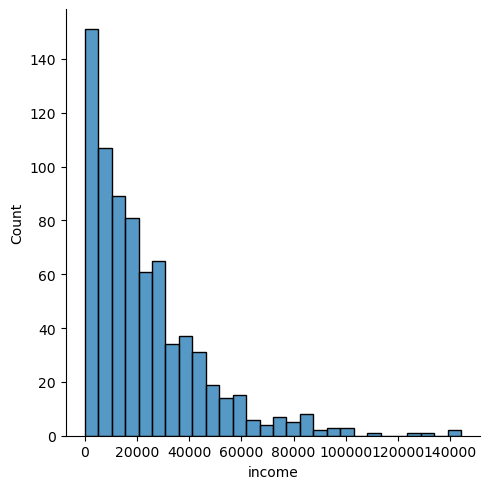

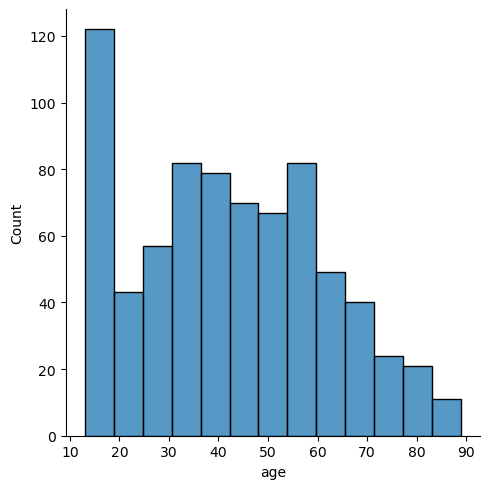

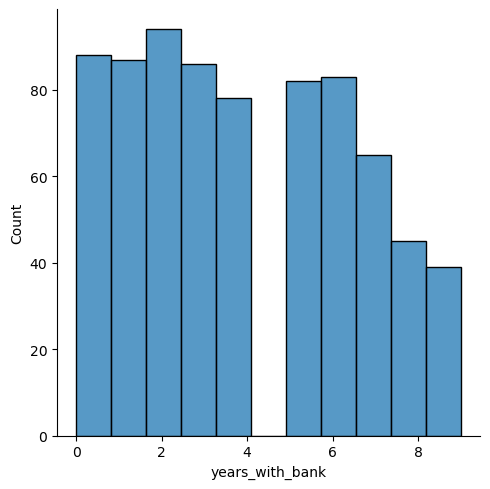

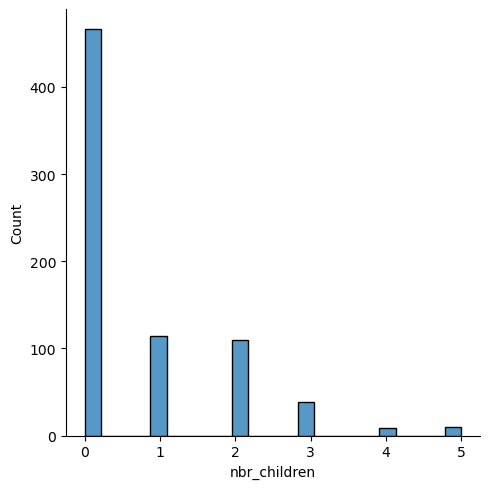

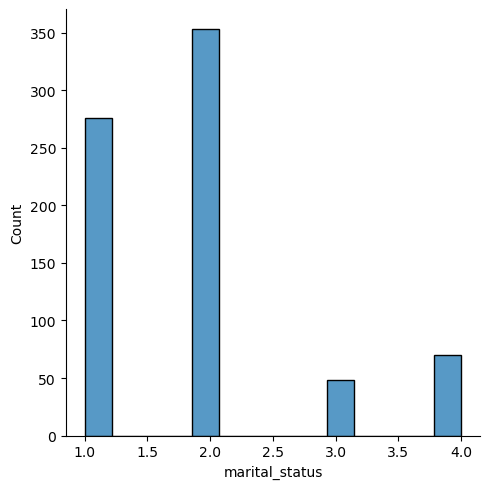

In [23]:
#numerical features
num_feats = customer_df.dtypes[customer_df.dtypes != 'object'].index.tolist()
# checking distribution with displot
for column in num_feats:
    sns.displot(customer_df[column])

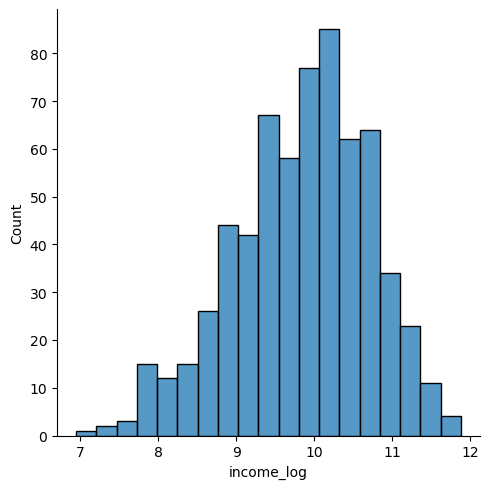

In [24]:
# converting income to normal distribution
customer_df["income_log"] = customer_df["income"].apply(np.log)
customer_df = customer_df.drop('income', axis=1)
sns.displot(customer_df["income_log"])

In [25]:
# categorical features
cat_feats = ['address']
df_dummy = pd.get_dummies(customer_df[cat_feats])
df_dummy

,address_Albuquerque NM,address_Anaheim CA,address_Arlington TX,address_Atlanta GA,address_Austin TX,address_Baltimore MD,address_Birmingham AL,address_Boston MA,address_Buffalo NY,address_Charlotte NC,...,address_Seattle WA,address_St Louis MO,address_St Paul MN,address_Tampa FL,address_Toledo OH,address_Tucson AZ,address_Tulsa OK,address_Virginia Beach VA,address_Washington DC,address_Wichita KS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
customer_df.drop(columns='address', inplace=True)
customer_df = customer_df.merge(df_dummy, left_index=True, right_index=True)

In [27]:
customer_df

,age,years_with_bank,nbr_children,gender,marital_status,income_log,address_Albuquerque NM,address_Anaheim CA,address_Arlington TX,address_Atlanta GA,...,address_Seattle WA,address_St Louis MO,address_St Paul MN,address_Tampa FL,address_Toledo OH,address_Tucson AZ,address_Tulsa OK,address_Virginia Beach VA,address_Washington DC,address_Wichita KS
0,46,5,1,M,2,10.171604,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,71,1,0,M,2,8.795582,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,8,0,F,1,9.828117,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,54,3,0,F,1,10.772016,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,59,9,2,F,4,10.704457,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,36,6,1,F,4,9.602045,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743,56,6,1,M,2,10.180627,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,50,0,2,M,2,11.023535,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,37,7,0,F,2,9.622450,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# mapping gender
gender_code = customer_df['gender'].apply(lambda x: 0 if x=='M ' else 1)
customer_df['gender'] = gender_code

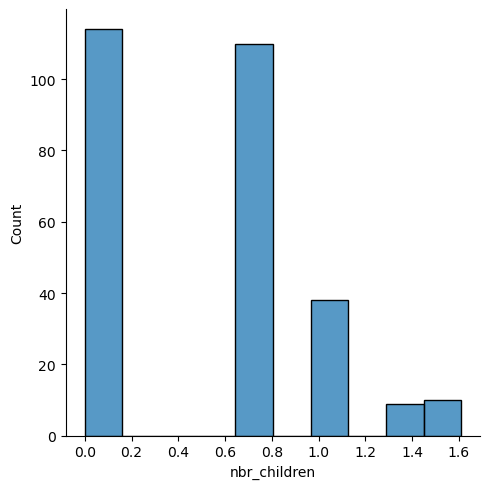

In [29]:
nbr_children_log = customer_df["nbr_children"].apply(np.log)
sns.displot(nbr_children_log)

In [30]:
customer_df

,age,years_with_bank,nbr_children,gender,marital_status,income_log,address_Albuquerque NM,address_Anaheim CA,address_Arlington TX,address_Atlanta GA,...,address_Seattle WA,address_St Louis MO,address_St Paul MN,address_Tampa FL,address_Toledo OH,address_Tucson AZ,address_Tulsa OK,address_Virginia Beach VA,address_Washington DC,address_Wichita KS
0,46,5,1,0,2,10.171604,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,71,1,0,0,2,8.795582,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,8,0,1,1,9.828117,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,54,3,0,1,1,10.772016,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,59,9,2,1,4,10.704457,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,36,6,1,1,4,9.602045,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743,56,6,1,0,2,10.180627,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,50,0,2,0,2,11.023535,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,37,7,0,1,2,9.622450,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


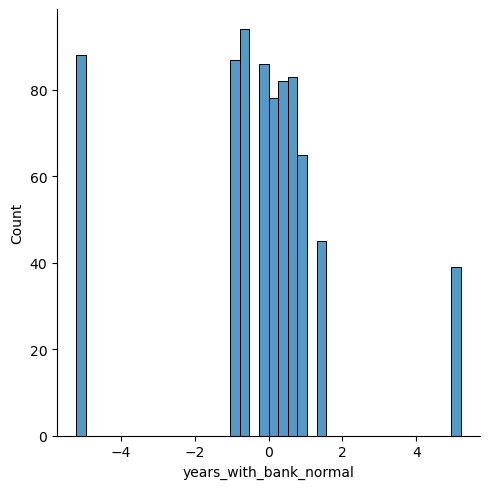

In [31]:
# conver years_with_bank with from sklearn.preprocessing import QuantileTransformer

from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(
    n_quantiles=747, 
    output_distribution="normal"
)
X = customer_df['years_with_bank'].to_numpy().reshape(-1,1)
customer_df['years_with_bank_normal'] = qt.fit_transform(X)
sns.displot(customer_df['years_with_bank_normal'] )

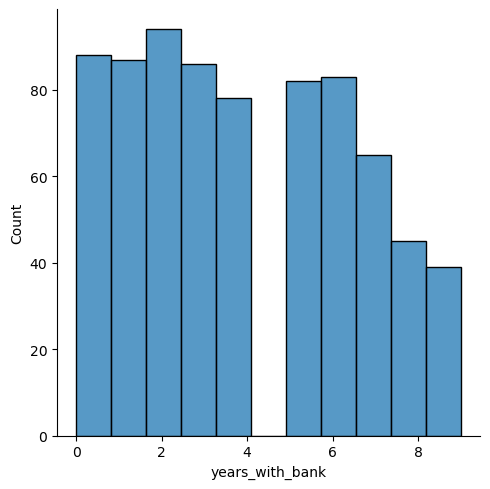

In [32]:
sns.displot(customer_df['years_with_bank'] )

In [33]:
customer_df.describe()

,age,years_with_bank,nbr_children,gender,marital_status,income_log,address_Albuquerque NM,address_Anaheim CA,address_Arlington TX,address_Atlanta GA,...,address_St Louis MO,address_St Paul MN,address_Tampa FL,address_Toledo OH,address_Tucson AZ,address_Tulsa OK,address_Virginia Beach VA,address_Washington DC,address_Wichita KS,years_with_bank_normal
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,...,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,42.479250,3.907631,0.714859,0.559572,1.882195,-inf,0.009371,0.013387,0.001339,0.002677,...,0.009371,0.009371,0.002677,0.009371,0.009371,0.012048,0.001339,0.008032,0.004016,-0.250228
std,19.114879,2.675634,1.103410,0.496771,0.892051,NaN,0.096413,0.115002,0.036588,0.051709,...,0.096413,0.096413,0.051709,0.096413,0.096413,0.109174,0.036588,0.089321,0.063287,2.224997
min,13.000000,0.000000,0.000000,0.000000,1.000000,-inf,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.199338
25%,28.000000,2.000000,0.000000,0.000000,1.000000,8.870440,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.533289
50%,42.000000,4.000000,0.000000,1.000000,2.000000,9.755104,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067252
75%,56.000000,6.000000,1.000000,1.000000,2.000000,10.352586,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.659798
max,89.000000,9.000000,5.000000,1.000000,4.000000,11.878658,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.199338


In [34]:
customer_df[customer_df['income_log'] < 0]

,age,years_with_bank,nbr_children,gender,marital_status,income_log,address_Albuquerque NM,address_Anaheim CA,address_Arlington TX,address_Atlanta GA,...,address_St Louis MO,address_St Paul MN,address_Tampa FL,address_Toledo OH,address_Tucson AZ,address_Tulsa OK,address_Virginia Beach VA,address_Washington DC,address_Wichita KS,years_with_bank_normal
6,16,1,0,0,1,-inf,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.932252
11,15,0,0,0,1,-inf,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-5.199338
15,15,0,0,0,1,-inf,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-5.199338
17,17,2,0,0,1,-inf,0,0,0,0,...,0,0,0,1,0,0,0,0,0,-0.533289
36,15,7,0,0,1,-inf,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.015954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,15,0,0,0,1,-inf,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-5.199338
721,13,5,0,1,1,-inf,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.344377
722,17,2,0,0,1,-inf,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.533289
734,17,2,0,1,1,-inf,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.533289


In [35]:
customer_df['income_log'].sort_values()[100:]

474         -inf
36          -inf
111     6.946014
512     7.355641
473     7.372118
         ...    
419    11.617322
422    11.758597
246    11.769086
639    11.865510
64     11.878658
Name: income_log, Length: 647, dtype: float64

In [36]:
income_log = customer_df['income_log'].apply(lambda x: 0 if x<0 else x)
income_log.sort_values()
customer_df['income_log'] = income_log

In [37]:
customer_df.describe()

,age,years_with_bank,nbr_children,gender,marital_status,income_log,address_Albuquerque NM,address_Anaheim CA,address_Arlington TX,address_Atlanta GA,...,address_St Louis MO,address_St Paul MN,address_Tampa FL,address_Toledo OH,address_Tucson AZ,address_Tulsa OK,address_Virginia Beach VA,address_Washington DC,address_Wichita KS,years_with_bank_normal
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,...,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,42.479250,3.907631,0.714859,0.559572,1.882195,8.500669,0.009371,0.013387,0.001339,0.002677,...,0.009371,0.009371,0.002677,0.009371,0.009371,0.012048,0.001339,0.008032,0.004016,-0.250228
std,19.114879,2.675634,1.103410,0.496771,0.892051,3.477151,0.096413,0.115002,0.036588,0.051709,...,0.096413,0.096413,0.051709,0.096413,0.096413,0.109174,0.036588,0.089321,0.063287,2.224997
min,13.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.199338
25%,28.000000,2.000000,0.000000,0.000000,1.000000,8.870440,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.533289
50%,42.000000,4.000000,0.000000,1.000000,2.000000,9.755104,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067252
75%,56.000000,6.000000,1.000000,1.000000,2.000000,10.352586,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.659798
max,89.000000,9.000000,5.000000,1.000000,4.000000,11.878658,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.199338


In [38]:
customer_df

,age,years_with_bank,nbr_children,gender,marital_status,income_log,address_Albuquerque NM,address_Anaheim CA,address_Arlington TX,address_Atlanta GA,...,address_St Louis MO,address_St Paul MN,address_Tampa FL,address_Toledo OH,address_Tucson AZ,address_Tulsa OK,address_Virginia Beach VA,address_Washington DC,address_Wichita KS,years_with_bank_normal
0,46,5,1,0,2,10.171604,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.344377
1,71,1,0,0,2,8.795582,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.932252
2,38,8,0,1,1,9.828117,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.393268
3,54,3,0,1,1,10.772016,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.208139
4,59,9,2,1,4,10.704457,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,36,6,1,1,4,9.602045,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.659798
743,56,6,1,0,2,10.180627,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.659798
744,50,0,2,0,2,11.023535,1,0,0,0,...,0,0,0,0,0,0,0,0,0,-5.199338
745,37,7,0,1,2,9.622450,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.015954


In [39]:
import seaborn as sn
import matplotlib.pyplot as plt

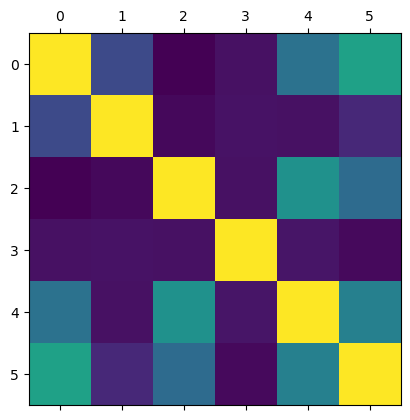

In [40]:
correlation_matrix = customer_df.iloc[:,:6].corr() # removing the addresses

plt.matshow(correlation_matrix)
plt.show()

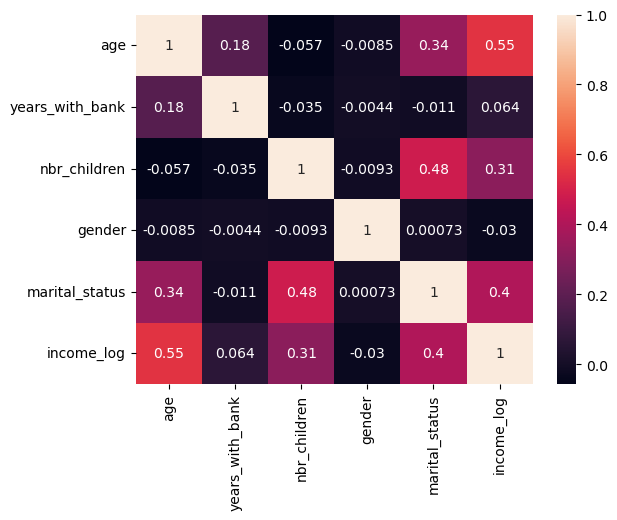

In [41]:
sn.heatmap(correlation_matrix, annot=True)
plt.show()

# Scaling

In [48]:

from sklearn.preprocessing import StandardScaler
# 
scaler = StandardScaler()
customer_df_scaled = pd.DataFrame(scaler.fit_transform(customer_df), columns = customer_df.columns)
# df_train_scaled = pd.DataFrame(scaler.fit_transform(df[num_feats]), columns=num_feats)
customer_df_scaled

,age,years_with_bank,nbr_children,gender,marital_status,income_log,address_Albuquerque NM,address_Anaheim CA,address_Arlington TX,address_Atlanta GA,...,address_St Louis MO,address_St Paul MN,address_Tampa FL,address_Toledo OH,address_Tucson AZ,address_Tulsa OK,address_Virginia Beach VA,address_Washington DC,address_Wichita KS,years_with_bank_normal
0,0.184312,0.408539,0.258591,-1.127172,0.132149,0.480869,-0.097260,-0.116484,-0.036613,-0.051813,...,-0.09726,-0.09726,-0.051813,-0.09726,-0.09726,-0.110432,-0.036613,-0.089984,-0.0635,0.267418
1,1.493070,-1.087435,-0.648298,-1.127172,0.132149,0.084871,-0.097260,-0.116484,-0.036613,-0.051813,...,-0.09726,-0.09726,-0.051813,-0.09726,-0.09726,-0.110432,-0.036613,-0.089984,-0.0635,-0.306733
2,-0.234490,1.530520,-0.648298,0.887176,-0.989614,0.382019,-0.097260,-0.116484,-0.036613,-0.051813,...,-0.09726,-0.09726,-0.051813,-0.09726,-0.09726,-0.110432,-0.036613,-0.089984,-0.0635,0.739146
3,0.603115,-0.339448,-0.648298,0.887176,-0.989614,0.653658,-0.097260,-0.116484,-0.036613,-0.051813,...,-0.09726,-0.09726,-0.051813,-0.09726,-0.09726,-0.110432,-0.036613,-0.089984,-0.0635,0.018929
4,0.864867,1.904514,1.165479,0.887176,2.375675,0.634216,-0.097260,-0.116484,-0.036613,-0.051813,...,-0.09726,-0.09726,-0.051813,-0.09726,-0.09726,-0.110432,-0.036613,-0.089984,-0.0635,2.450887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-0.339191,0.782533,0.258591,0.887176,2.375675,0.316959,-0.097260,-0.116484,-0.036613,-0.051813,...,-0.09726,-0.09726,-0.051813,-0.09726,-0.09726,-0.110432,-0.036613,-0.089984,-0.0635,0.409275
743,0.707816,0.782533,0.258591,-1.127172,0.132149,0.483466,-0.097260,-0.116484,-0.036613,-0.051813,...,-0.09726,-0.09726,-0.051813,-0.09726,-0.09726,-0.110432,-0.036613,-0.089984,-0.0635,0.409275
744,0.393714,-1.461429,1.165479,-1.127172,0.132149,0.726042,10.281745,-0.116484,-0.036613,-0.051813,...,-0.09726,-0.09726,-0.051813,-0.09726,-0.09726,-0.110432,-0.036613,-0.089984,-0.0635,-2.225812
745,-0.286841,1.156526,-0.648298,0.887176,0.132149,0.322831,-0.097260,-0.116484,-0.036613,-0.051813,...,-0.09726,-0.09726,-0.051813,-0.09726,-0.09726,-0.110432,-0.036613,-0.089984,-0.0635,0.569453


In [49]:
customer_df_scaled.describe()

,age,years_with_bank,nbr_children,gender,marital_status,income_log,address_Albuquerque NM,address_Anaheim CA,address_Arlington TX,address_Atlanta GA,...,address_St Louis MO,address_St Paul MN,address_Tampa FL,address_Toledo OH,address_Tucson AZ,address_Tulsa OK,address_Virginia Beach VA,address_Washington DC,address_Wichita KS,years_with_bank_normal
count,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,...,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02,7.470000e+02
mean,-1.284113e-16,-8.085158e-17,-2.615787e-17,1.070094e-16,-1.462462e-16,-2.496887e-17,-2.496887e-17,4.755975e-18,2.377988e-17,9.511951e-18,...,-4.874875e-17,-4.874875e-17,9.511951e-18,-4.993774e-17,-4.755975e-17,1.664591e-17,4.755975e-18,3.091384e-17,-1.902390e-17,-1.902390e-17
std,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,...,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00,1.000670e+00
min,-1.543248e+00,-1.461429e+00,-6.482980e-01,-1.127172e+00,-9.896144e-01,-2.446360e+00,-9.725975e-02,-1.164840e-01,-3.661260e-02,-5.181278e-02,...,-9.725975e-02,-9.725975e-02,-5.181278e-02,-9.725975e-02,-9.725975e-02,-1.104315e-01,-3.661260e-02,-8.998425e-02,-6.350006e-02,-2.225812e+00
25%,-7.579934e-01,-7.134417e-01,-6.482980e-01,-1.127172e+00,-9.896144e-01,1.064143e-01,-9.725975e-02,-1.164840e-01,-3.661260e-02,-5.181278e-02,...,-9.725975e-02,-9.725975e-02,-5.181278e-02,-9.725975e-02,-9.725975e-02,-1.104315e-01,-3.661260e-02,-8.998425e-02,-6.350006e-02,-1.273035e-01
50%,-2.508891e-02,3.454560e-02,-6.482980e-01,8.871760e-01,1.321488e-01,3.610068e-01,-9.725975e-02,-1.164840e-01,-3.661260e-02,-5.181278e-02,...,-9.725975e-02,-9.725975e-02,-5.181278e-02,-9.725975e-02,-9.725975e-02,-1.104315e-01,-3.661260e-02,-8.998425e-02,-6.350006e-02,1.427838e-01
75%,7.078156e-01,7.825328e-01,2.585908e-01,8.871760e-01,1.321488e-01,5.329529e-01,-9.725975e-02,-1.164840e-01,-3.661260e-02,-5.181278e-02,...,-9.725975e-02,-9.725975e-02,-5.181278e-02,-9.725975e-02,-9.725975e-02,-1.104315e-01,-3.661260e-02,-8.998425e-02,-6.350006e-02,4.092753e-01
max,2.435376e+00,1.904514e+00,3.886146e+00,8.871760e-01,2.375675e+00,9.721328e-01,1.028175e+01,8.584870e+00,2.731300e+01,1.930026e+01,...,1.028175e+01,1.028175e+01,1.930026e+01,1.028175e+01,1.028175e+01,9.055385e+00,2.731300e+01,1.111306e+01,1.574802e+01,2.450887e+00


# Hierarchal Modelling

In [43]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac = AgglomerativeClustering(metric='euclidean',
                             linkage='ward',
                             n_clusters = 3)

In [46]:
X = customer_df_scaled.iloc[:,:6]

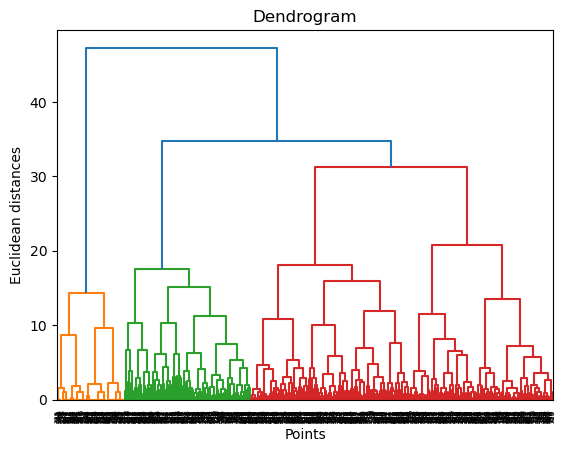

In [47]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()
    
plot_dendrogram(X)

* Therefore 4 clusters, right?

In [96]:
ac = AgglomerativeClustering(metric='euclidean',
                                    linkage='single',
                                    n_clusters = 2)
y_hc = ac.fit_predict(X)

In [97]:
y_hc

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

# PCA to reduce dimensions and plot 

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

X_pca = pca.fit(X)

### plot the expanded ratio variance

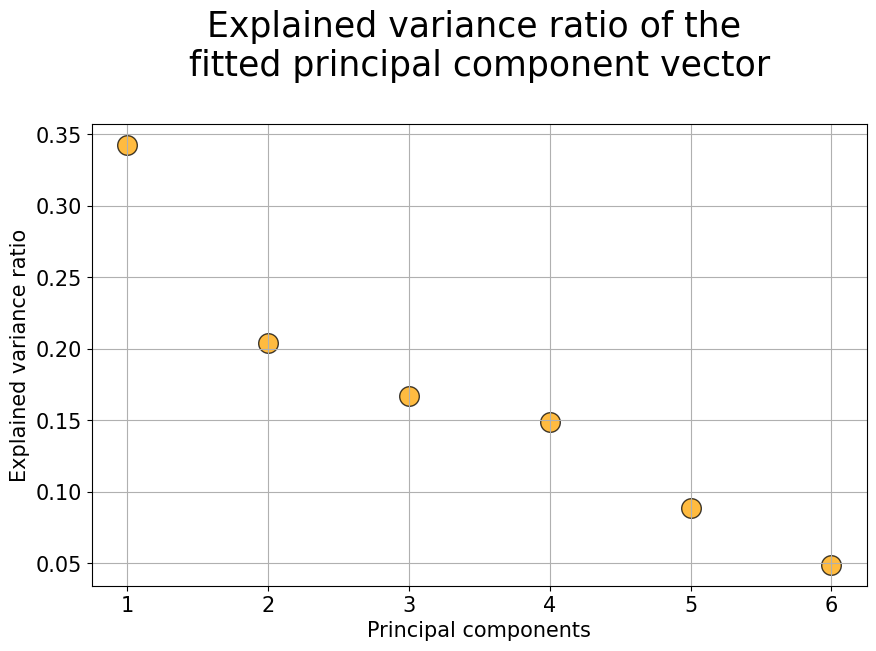

In [99]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(X_pca.explained_variance_ratio_))],
            y=X_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(X_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**first 2 PCA together make up 0.55 of the information**

### visualize class separation using the first 2 Principal components

In [100]:
# function to plot clusters
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

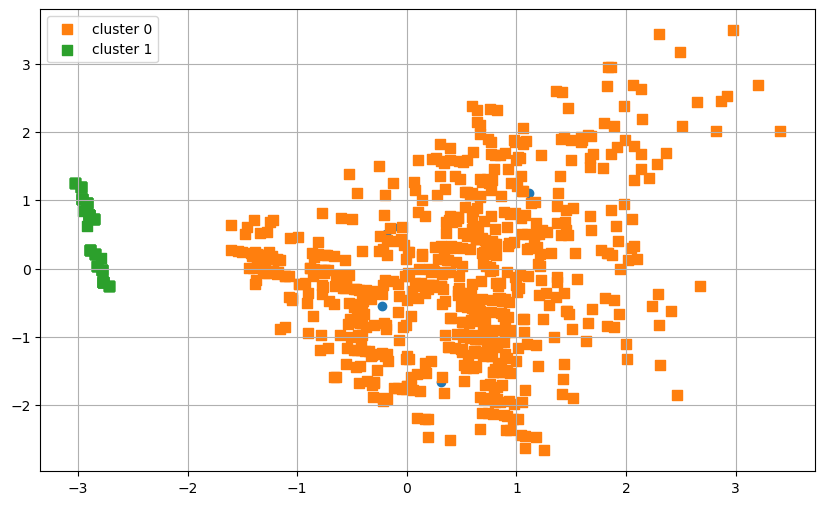

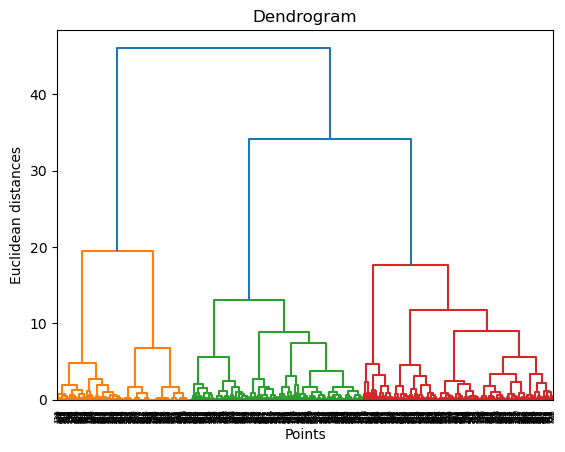

In [101]:
X_trans = pca.transform(X)
X_trans_df = pd.DataFrame(data=X_trans)

plt.figure(figsize=(10,6))
plt.scatter(X_trans[0],X_trans[1])



y_hc = ac.fit_predict(X)
plot_clusters(X_trans[:,:2],y_hc)
plot_dendrogram(X_trans[:,:2], method='ward')